# Visualiser les données

Il serait également inréressant de visualiser ces données pour chaque jour de l'année dans son ensemble

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
filename = '../Penn_State_PA_2012.gzip'
df = pd.read_csv(filename, encoding='utf-8', compression='gzip', index_col='timestamp', parse_dates=True)
df.index = df.index.tz_localize('UTC').tz_convert('US/Eastern')

In [3]:
col_flag = df.columns[df.columns.str.endswith('_Flag')]
col_noflag = col_flag.str.replace('_Flag', '')
for i in col_noflag.values:
    df.loc[df[i + '_Flag'] > 0, i] = np.nan

In [4]:
pivoted = df.pivot_table('diffuse',index=df.index.time,columns=df.index.date)
pivoted.head()

,2012-01-01,2012-01-02,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-07,2012-01-08,2012-01-09,2012-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31
00:00:00,0.1,0.6,0.5,0.2,0.4,0.2,0.5,0.1,0.2,0.1,...,-0.2,-0.2,-0.1,0.1,-0.3,0.0,0.0,0.0,-0.2,-0.3
00:01:00,0.1,0.7,0.5,0.2,0.4,0.1,0.4,0.1,0.2,0.2,...,-0.2,-0.2,-0.1,0.1,-0.3,0.0,0.0,0.0,-0.2,-0.3
00:02:00,0.1,0.7,0.5,0.2,0.2,0.1,0.4,0.2,0.2,0.2,...,-0.2,-0.2,-0.1,0.1,-0.3,0.0,0.0,0.0,-0.2,-0.2
00:03:00,0.1,0.7,0.6,0.3,0.2,0.1,0.4,0.1,0.2,0.2,...,-0.2,-0.3,-0.1,0.1,-0.2,-0.1,-0.1,0.0,-0.2,-0.2
00:04:00,0.0,0.7,0.8,0.3,0.2,0.1,0.3,0.1,0.2,0.2,...,-0.2,-0.2,-0.1,0.1,-0.1,-0.1,-0.1,0.0,-0.2,-0.2


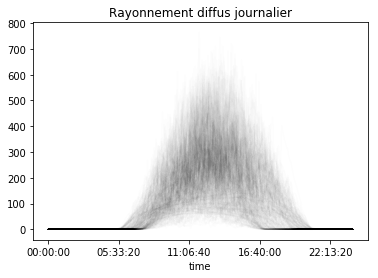

In [5]:
pivoted.plot(legend=False, alpha=0.006, c='k', title='Rayonnement diffus journalier')